In [1]:
# Input and output vectors are given. 
inp = [ 0.7300, -1.0400, -1.2300,  1.6700, -0.6300,  1.4300, -0.8400,  0.1500,
         -2.3000,  3.1000, -1.4500, -1.8100,  1.8700, -0.1100, -0.2800,  1.1200,
         -0.4200,  2.8900]
'''out = [ 1.23,  9.84,  9.47,  0.73,  9.61, -0.1,  9.09,  4.8,
         -7.6, 35.37,  7.85,  3.6,  2.39,  6.85,  7.9, -0.18,
          8.51, 25.8]'''
out = [ 1.43,  10.1,  8.3,  1.03,  10.21, -0.1,  8.92,  5.1,
         -7.53, 34.72,  7.61,  3.2,  2.19,  7.15,  7.69, -0.18,
          8.81, 23.1]

In [2]:
import torch

inp = torch.tensor(inp).unsqueeze(1)
out = torch.tensor(out).unsqueeze(1)

n_samples = inp.shape[0]
shuffled_indexes = torch.randperm(n_samples)

n_val = int(n_samples * 0.2)
n_train = n_samples - n_val

val_indexes = shuffled_indexes[:n_val]
train_indexes = shuffled_indexes[n_val:]

train_inp = inp[train_indexes]
train_out = out[train_indexes]
val_inp = inp[val_indexes]
val_out = out[val_indexes]

train_inp.shape, train_out.shape, val_inp.shape, val_out.shape

(torch.Size([15, 1]),
 torch.Size([15, 1]),
 torch.Size([3, 1]),
 torch.Size([3, 1]))

In [68]:
import torch.nn as nn

seq_model = nn.Sequential(nn.Linear(1,15),
                          nn.Tanh(),
                          nn.Linear(15,23),
                          nn.Tanh(),
                          nn.Linear(23,1))

for (name, param) in seq_model.named_parameters():
    print(name, param.shape)
#L0: 15 w,  15 b
#L2: 15*23 w, 23 b
#L4: 23 w, 1 b

def training(train_inp, train_out, val_inp, val_out,
             model, optimizer, loss_fn, n_epochs):
    for epoch in range(1 + n_epochs):
        train_loss = loss_fn(model(train_inp), train_out)
        with torch.no_grad():
            val_loss = loss_fn(model(val_inp), val_out)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch % 5000== 0:
            print('epoch %d, training loss %f, validation loss %f' %(epoch, float(train_loss), float(val_loss)))
    return model

0.weight torch.Size([15, 1])
0.bias torch.Size([15])
2.weight torch.Size([23, 15])
2.bias torch.Size([23])
4.weight torch.Size([1, 23])
4.bias torch.Size([1])


In [69]:
import torch.optim as optim

model = training(train_inp = train_inp, train_out = train_out, 
                 val_inp = val_inp, val_out = val_out, 
                 model = seq_model, optimizer = optim.SGD(seq_model.parameters(), lr = 1e-3),
                 loss_fn = nn.MSELoss(), n_epochs = 50000)

epoch 0, training loss 156.415909, validation loss 50.940857
epoch 5000, training loss 0.259971, validation loss 0.152511
epoch 10000, training loss 0.203857, validation loss 0.110293
epoch 15000, training loss 0.136786, validation loss 0.104868
epoch 20000, training loss 0.129702, validation loss 0.103050
epoch 25000, training loss 0.126805, validation loss 0.103899
epoch 30000, training loss 0.124527, validation loss 0.107680
epoch 35000, training loss 0.122602, validation loss 0.114122
epoch 40000, training loss 0.120916, validation loss 0.123002
epoch 45000, training loss 0.119415, validation loss 0.134104
epoch 50000, training loss 0.118070, validation loss 0.147116


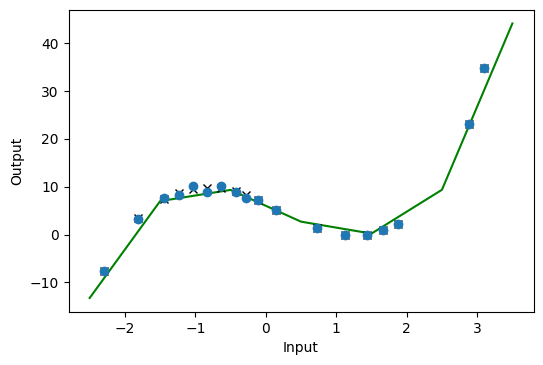

In [84]:
from matplotlib import pyplot as plt

t_range = torch.arange(-2.5,4.5).unsqueeze(1)

fig = plt.figure(dpi=100)
plt.xlabel("Input")
plt.ylabel("Output")
pred = model(inp)
plt.plot(t_range.numpy(), seq_model(t_range).detach().numpy(), 'g-')
plt.plot(inp.numpy(), pred.detach().numpy(),'kx')
plt.plot(inp.numpy(), out.numpy(), 'o')